<a href="https://colab.research.google.com/github/izzaqayyum/Final-Project---US-presidents-energy-leanings/blob/main/Final_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This analysis aims to investigate whether the past three US presidents, Presidents Obama, Trump and Biden, have stuck by their campaign promises regarding the energy sector while in office. It looks at their annual speeches to the Congress as well as to the United National General Assembly (UNGA) to gauge their energy leaning while in office and compares them to their agendas when they were running for office.

# Background

All three presidents talked about their vision for the energy sector of USA in their campaigns. Main points of their specific agendas are highlighted below.

### *President Barrack Obama*

*   Introduce an economy wide cap-and-trade program to reduce Greenhouse Gas emissions.
*   Investing $150 billion to develop and deploy climate friendly energy supplies, protect our existing manufacturing base and create millions of new jobs
*   Improve energy efficiency to reduce energy intensity
Decrease oil consumption to reduce dependence on foreign oil (this was before the shale revolution which took off post-2008)
*   Leading a global warming partnership internationally

### *President Trump*

*   Lift the restrictions on the production of energy reserves, including shale, oil, natural gas and clean coal which are worth $50 trillion of jobs for Americans.
*   Allow for advancement of projects like the Keystone pipeline
*   Stop payments to international organizations like the UN for climate change and redirect it towards infrastructure development in the country

### *President Biden*

*   Invest $400 billion over ten years, as one part of a broad mobilization of public investment, in clean energy and innovation
*   Make it a priority for all federal agencies to develop solutions for environmental injustices affecting communities of color, low-income communities, and indigenous communities
*   Set a target of reducing the carbon footprint of the U.S. building stock 50% by 2035

These agendas show that President Obama wanted to reduce GHG emissions and make USA a leader in global warming issues but did not say much about transition to clean energy. President Trump went in completely the opposite direction and promised to increase production of oil and gas, and President Biden aimed to move the economy towards renewable energy.

The hypothesis being tested in this paper is that these stances would be reflected in their speeches to the Congress and to the UNGA over their tenures as presidents.

# Data

The timeline of the speeches being used in this research spans from 2009 to 2024. The two types of speeches were chosen due to their different contexts as explained below.

### *State of the Union (SoU) address*

This is an annual speech that US presidents give to a joint session of the Congress. The purpose of the speech is to inform the Congress of the policies and actions that the president implemented over the past year. In the first year of the presidency this speech covers what the president aims to achieve over the course of the course of the next year. This speech is a proxy for internal governance plans and the image that the president wants to give to the US population.

### *United Nations General Assembly (UNGA) Address*

Every year American presidents give a speech at the UNGA in which they share their vision for the international community and USA’s role in it. This may differ from the SoU address because the policies discussed here would not be for the benefit of the American population. This speech was chosen as a proxy for the image of the country that the president portrays in the international arena.

### *Number of speeches*
There are a total of 32 speeches chosen for this paper. Their breakdown is given below.


*   President Obama: 8 SoU addresses and 8 UNGA address (2009 to 2016)
*   President Trump: 4 SoU addresses and 4 UNGA address (2017 to 2020)
*   President Biden: 4 SoU addresses and 4 UNGA address (2021 to 2024)

### *Sources*

Speeches are sourced from two different websites.

*   The American Presidency Project
*   White House Archives


# Methodology

Term Frequency – Inverse Document Frequency (TF-IDF) was chosen as the methodology to analyze the terms related to energy that the presidents used in their SoU and UNGA addresses.

The first step was to import the packages needed to scrape the 32 articles which include requests, to access the websites for articles, BeautifulSoup, to get the text in easy-to-read format, and re, for dealing with strings.
URLs for the speeches were divided into two types; those that has President names, dates and forums mentioned in them and those that did not. For the speeches that did have these identifiers, metadata was extracted and president names, year of the speech and forum of the speech were extracted. Articles’ content was scraped using requests and BeautifulSoup.


In [87]:
#pip install requests beautifulsoup4
#!pip install altair_saver
#!pip install selenium

In [72]:
import requests
from bs4 import BeautifulSoup
import re

# First, I will scrape URLs that have some mention of date, forum's location and President's name in them.
# As the code below shows, using logical filters, I am directly extracting these details from the URL address, and then accordingly scraping the entire webpage for each.

urls = [
    "https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/04/29/remarks-by-president-biden-in-address-to-a-joint-session-of-congress/",
    "https://obamawhitehouse.archives.gov/the-press-office/2010/09/23/remarks-president-united-nations-general-assembly",
    "https://obamawhitehouse.archives.gov/the-press-office/2011/09/21/remarks-president-obama-address-united-nations-general-assembly",
    "https://obamawhitehouse.archives.gov/the-press-office/2012/09/25/remarks-president-un-general-assembly",
    "https://obamawhitehouse.archives.gov/the-press-office/2013/09/24/remarks-president-obama-address-united-nations-general-assembly",
    "https://obamawhitehouse.archives.gov/the-press-office/2014/09/24/remarks-president-obama-address-united-nations-general-assembly",
    "https://obamawhitehouse.archives.gov/the-press-office/2015/09/28/remarks-president-Obama-united-nations-general-assembly",
    "https://obamawhitehouse.archives.gov/the-press-office/2016/09/20/address-president-obama-71st-session-united-nations-general-assembly",
    "https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/09/21/remarks-by-president-biden-before-the-76th-session-of-the-united-nations-general-assembly/",
    "https://www.whitehouse.gov/briefing-room/speeches-remarks/2022/09/21/remarks-by-president-biden-before-the-77th-session-of-the-united-nations-general-assembly/",
    "https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/09/19/remarks-by-president-biden-before-the-78th-session-of-the-united-nations-general-assembly-new-york-ny/",
    "https://www.whitehouse.gov/briefing-room/speeches-remarks/2024/09/24/remarks-by-president-biden-before-the-79th-session-of-the-united-nations-general-assembly-new-york-ny/"
]

# Function to extract metadata
def extract_metadata(url):
    president = None
    date = None
    forum = None

    # Classify President based on URL
    if 'obama' in url.lower():
        president = 'Barack Obama'
    elif 'trump' in url.lower():
        president = 'Donald Trump'
    elif 'biden' in url.lower():
        president = 'Joe Biden'

    # Extract Date from URL (looking for patterns like 2017, 2021, etc.)
    date_pattern = r'(\d{4})'
    date_match = re.search(date_pattern, url)
    if date_match:
        date = date_match.group(1)

    # Extract Forum from URL (looking for keywords like "joint-session-of-congress", "united-nations-general-assembly", etc.)
    if 'union' in url.lower() or 'state' in url.lower():
        forum = 'State of the Union'
    elif 'joint-session-of-congress' in url.lower():
        forum = 'State of the Union'
    elif 'united-nations-general-assembly' in url.lower():
        forum = 'United Nations General Assembly'

    # Return metadata
    return president, date, forum

# Scraping all text from a webpage and extract metadata
def scrape_all_text(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')


        text_content = soup.get_text(separator=' ', strip=True)


        president, date, forum = extract_metadata(url)

        # If any metadata is missing (president or date), try to scrape from the page itself
        if not president or not date or not forum:

            if not president:
                president_tag = soup.find('h1')
                if president_tag:
                    president = president_tag.get_text().strip()

            # Try to extract date from the page
            if not date:
                date_tag = soup.find('time')
                if date_tag:
                    date = date_tag.get_text().strip()

            # Try to extract forum from the page
            if not forum:
                forum_tag = soup.find(string=re.compile('state of the union', re.IGNORECASE))
                if forum_tag:
                    forum = 'State of the Union'
                elif soup.find(string=re.compile('united nations general assembly', re.IGNORECASE)):
                    forum = 'United Nations General Assembly'
                elif soup.find(string=re.compile('joint session of congress', re.IGNORECASE)):
                    forum = 'Joint Session of Congress'

        # Return all the scraped data
        return {
            'url': url,
            'president': president,
            'date': date,
            'forum': forum,
            'text': text_content
        }

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return None

# Scrape all URLs and print results
for url in urls:
    scrape_from_url_data = scrape_all_text(url)
    if scrape_from_url_data:
        print(f"Scraped data from {url}:")
        print(f"President: {scrape_from_url_data['president']}")
        print(f"Date: {scrape_from_url_data['date']}")
        print(f"Forum: {scrape_from_url_data['forum']}")
        print(f"Text: {scrape_from_url_data['text'][:200]}...")  # Print the first 200 characters of the text
        print("="*50)


Scraped data from https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/04/29/remarks-by-president-biden-in-address-to-a-joint-session-of-congress/:
President: Joe Biden
Date: 2021
Forum: State of the Union
Text: Remarks by President Biden in Address to a Joint Session of Congress | The White House Skip to content The White House The White House The White House Home Administration The Record Briefing Room Visi...
Scraped data from https://obamawhitehouse.archives.gov/the-press-office/2010/09/23/remarks-president-united-nations-general-assembly:
President: Barack Obama
Date: 2010
Forum: United Nations General Assembly
Text: Remarks by the President to the United Nations General Assembly | whitehouse.gov Jump to main content Jump to navigation This is historical material “frozen in time”. The website is no longer updated ...
Scraped data from https://obamawhitehouse.archives.gov/the-press-office/2011/09/21/remarks-president-obama-address-united-nations-general-assembly:
Presiden

Next, URLs that did not contain identifiers were scraped and manually assigned the identifiers of president, date and forum.

In [73]:
import requests
from bs4 import BeautifulSoup

# For URLs that do not contain any President's name, or date of address in them, I have manually added this information as labels directly to the list, and then accordingly scraped each webpage.

# Combined list of URLs and their corresponding metadata
urls_with_metadata = [
    {
        "url": "https://obamawhitehouse.archives.gov/the-press-office/remarks-president-barack-obama-address-joint-session-congress",
        "metadata": {
            "president": "Barack Obama",
            "date": "2009",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-17",
        "metadata": {
            "president": "Barack Obama",
            "date": "2010",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-16",
        "metadata": {
            "president": "Barack Obama",
            "date": "2011",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-15",
        "metadata": {
            "president": "Barack Obama",
            "date": "2012",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-congress-the-state-the-union-2",
        "metadata": {
            "president": "Barack Obama",
            "date": "2013",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-21",
        "metadata": {
            "president": "Barack Obama",
            "date": "2014",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-20",
        "metadata": {
            "president": "Barack Obama",
            "date": "2015",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-19",
        "metadata": {
            "president": "Barack Obama",
            "date": "2016",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-2",
        "metadata": {
            "president": "Donald Trump",
            "date": "2017",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-25",
        "metadata": {
            "president": "Donald Trump",
            "date": "2018",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-26",
        "metadata": {
            "president": "Donald Trump",
            "date": "2019",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-27",
        "metadata": {
            "president": "Donald Trump",
            "date": "2020",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-28",
        "metadata": {
            "president": "Joe Biden",
            "date": "2022",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-29",
        "metadata": {
            "president": "Joe Biden",
            "date": "2023",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-30",
        "metadata": {
            "president": "Joe Biden",
            "date": "2024",
            "forum": "State of the Union"
        }
    },
    {
        "url": "https://obamawhitehouse.archives.gov/the-press-office/remarks-president-united-nations-general-assembly",
        "metadata": {
            "president": "Barack Obama",
            "date": "2009",
            "forum": "United Nations General Assembly"
        }
    },
     {
        "url": "https://br.usembassy.gov/remarks-president-trump-72nd-session-united-nations-general-assembly/",
        "metadata": {
            "president": "Donald Trump",
            "date": "2017",
            "forum": "United Nations General Assembly"
        }
    },
    {
        "url": "https://trumpwhitehouse.archives.gov/briefings-statements/remarks-president-trump-73rd-session-united-nations-general-assembly-new-york-ny/",
        "metadata": {
            "president": "Donald Trump",
            "date": "2018",
            "forum": "United Nations General Assembly"
        }
    },
    {
        "url": "https://trumpwhitehouse.archives.gov/briefings-statements/remarks-president-trump-74th-session-united-nations-general-assembly/",
        "metadata": {
            "president": "Donald Trump",
            "date": "2019",
            "forum": "United Nations General Assembly"
        }
    },
    {
        "url": "https://trumpwhitehouse.archives.gov/briefings-statements/remarks-president-trump-75th-session-united-nations-general-assembly/",
        "metadata": {
            "president": "Donald Trump",
            "date": "2020",
            "forum": "United Nations General Assembly"
        }
    }
]


# Function to scrape and process text from a URL
def scrape_speech_data(url_data):
    try:
        response = requests.get(url_data["url"])
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        text_content = soup.get_text(separator=' ', strip=True)

        # Retrieve metadata from the pre-filled metadata
        president = url_data["metadata"]["president"]
        date = url_data["metadata"]["date"]
        forum = url_data["metadata"]["forum"]

        # Print out the scraped data for verification
        print(f"Scraped data from {url_data['url']}:")
        print(f"President: {president}")
        print(f"Date: {date}")
        print(f"Forum: {forum}")
        print(f"Text: {text_content[:500]}...")

        return {
            "url": url_data["url"],
            "president": president,
            "date": date,
            "forum": forum,
            "text": text_content
        }
    except requests.exceptions.RequestException as e:
        print(f"Error scraping {url_data['url']}: {e}")
        return None

# Scraping all the URLs with metadata
manual_scraped_data = []
for url_data in urls_with_metadata:
    data = scrape_speech_data(url_data)
    if data:
        manual_scraped_data.append(data)

Scraped data from https://obamawhitehouse.archives.gov/the-press-office/remarks-president-barack-obama-address-joint-session-congress:
President: Barack Obama
Date: 2009
Forum: State of the Union
Text: Remarks of President Barack Obama -- Address to Joint Session of Congress | whitehouse.gov Jump to main content Jump to navigation This is historical material “frozen in time”. The website is no longer updated and links to external websites and some internal pages may not work. Home Briefing Room From the News Room Latest News Read the latest blog posts from 1600 Pennsylvania Ave Share-Worthy Check out the most popular infographics and videos Photos View the photo of the day and other galleries ...
Scraped data from https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-17:
President: Barack Obama
Date: 2010
Forum: State of the Union
Text: Address Before a Joint Session of the Congress on the State of the Union | The American Presidency Pr

The scraped data was formatted as a data frame and saved using the pandas library. This library had the following columns/variables.

*  URL
*  President
*  Date
*  Forum
*  Text

In [74]:
import pandas as pd

# After scraping all of our required URLs using the above two stages, first, where I managed URLs that included metadata information in the address, and second, for manually labelled URLs that did not have metadata information in their address.
# The next step here is to convert both into DataFrames, and then create one merged DataFrame, which will be used in the upcoming analysis stages.

# Converting the dictionary `scrape_from_url_data` to a list of dictionaries.
scrape_from_url_data_list = [scrape_from_url_data]

# Converting both lists (scrape_from_url_data_list and manual_scraped_data) to DataFrames
scrape_from_url_df = pd.DataFrame(scrape_from_url_data_list)
manual_scraped_df = pd.DataFrame(manual_scraped_data)

# Merge both DataFrames
merged_df = pd.concat([scrape_from_url_df, manual_scraped_df], ignore_index=True)

# Preview the merged DataFrame
print(merged_df)

                                                  url     president  date  \
0   https://www.whitehouse.gov/briefing-room/speec...     Joe Biden  2024   
1   https://obamawhitehouse.archives.gov/the-press...  Barack Obama  2009   
2   https://www.presidency.ucsb.edu/documents/addr...  Barack Obama  2010   
3   https://www.presidency.ucsb.edu/documents/addr...  Barack Obama  2011   
4   https://www.presidency.ucsb.edu/documents/addr...  Barack Obama  2012   
5   https://www.presidency.ucsb.edu/documents/addr...  Barack Obama  2013   
6   https://www.presidency.ucsb.edu/documents/addr...  Barack Obama  2014   
7   https://www.presidency.ucsb.edu/documents/addr...  Barack Obama  2015   
8   https://www.presidency.ucsb.edu/documents/addr...  Barack Obama  2016   
9   https://www.presidency.ucsb.edu/documents/addr...  Donald Trump  2017   
10  https://www.presidency.ucsb.edu/documents/addr...  Donald Trump  2018   
11  https://www.presidency.ucsb.edu/documents/addr...  Donald Trump  2019   

Moving onto the text analysis stage of the project, the first move was to create a TF matrix, and then a TF-IDF matrix - as these would serve as the basis for later analysis. The Tfidf vectorizer package was required to create the matrix and stop words were removed. The TF-IDF matrix was saved as a data frame and viewing this data frame showed that it contained TF-IDF scores for all the words spoken in the 32 speeches and these were sorted by president names.

In [75]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

#Ensuring president can be used as an index
president = merged_df['president'].tolist()

# Step 1: Term Frequency (TF)
vectorizer_tf = CountVectorizer(stop_words='english')
tf_matrix = vectorizer_tf.fit_transform(merged_df['text'])

# Converting TF matrix to DataFrame
tf_df = pd.DataFrame(tf_matrix.toarray(), index=president, columns=vectorizer_tf.get_feature_names_out()).groupby(president).sum()

# Step 2: Term Frequency-Inverse Document Frequency (TF-IDF)
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer_tfidf.fit_transform(merged_df['text'])

# Converting TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=president, columns=vectorizer_tfidf.get_feature_names_out()).groupby(president).sum()


print("TF Matrix:\n", tf_df.head())
print("\nTF-IDF Matrix:\n", tfidf_df.head())


TF Matrix:
               000  01  04  05  06  07  08  09  10  100  ...  youngest  \
Barack Obama   37   0   0   0   0   0   0   0  40   20  ...         2   
Donald Trump   43   0   1   1   1   1   0   1  21   18  ...         2   
Joe Biden      44   1   0   0   0   2   2   1  22   12  ...         0   

              youngstown  youth  youtube  zealand  zeitchik  zelenskiy  zero  \
Barack Obama           2      0        2        0         0          0     4   
Donald Trump           0      6        3        0         2          0     0   
Joe Biden              0      0        3        1         0          2     7   

              zip  zones  
Barack Obama    0      0  
Donald Trump    0      3  
Joe Biden       1      0  

[3 rows x 8105 columns]

TF-IDF Matrix:
                    000     01        04        05        06        07  \
Barack Obama  0.225757  0.000  0.000000  0.000000  0.000000  0.000000   
Donald Trump  0.271854  0.000  0.016196  0.017481  0.016196  0.013915   
Joe B

In [76]:
# Filtering and preparing our TF-IDF matrix;

from sklearn.feature_extraction.text import TfidfVectorizer

# Custom list of additional stop words
custom_stop_words = [
    'and', 'the', 'is', 'it', 'to', 'of', 'for', 'that', 'a', 'on', 'with',
    'as', 'in', 'this', 'at', 'be', 'by', 'an', 'was', 'are', 'but', 'from',
    'have', 'had', 'were', 'you', 'they', 'we', 'not', 'which', 'can', 'all', 'let', 'need'
]

# Combine custom stop words with the built-in 'english' stop words
stop_words = 'english'

# Initialize the TfidfVectorizer with various filters
vectorizer_tfidf = TfidfVectorizer(
    stop_words=stop_words,  # Use built-in stop words + custom ones
    max_df=0.90,            # Ignore terms that appear in more than 90% of the documents (high frequency)
    ngram_range=(1, 2),     # Consider unigrams (1-word) and bigrams (2-word combinations)
    lowercase=True          # Ensure all terms are converted to lowercase
)

# Fit the vectorizer and transform the text data
tfidf_matrix = vectorizer_tfidf.fit_transform(merged_df['text'])

# Convert TF-IDF matrix to DataFrame for better inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=president, columns=vectorizer_tfidf.get_feature_names_out()).groupby(president).sum()


tfidf_df.head()


,000,000 airstrikes,000 american,000 americans,000 arrests,000 assaults,000 billionaires,000 brave,000 bucks,000 burglaries,...,zero mind,zero place,zero president,zero sum,zip,zip code,zones,zones helping,zones plan,zones tradesman
Barack Obama,0.175503,0.014869,0.029295,0.017792,0.000000,0.000000,0.000000,0.023538,0.000000,0.00000,...,0.013384,0.000000,0.000000,0.013579,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
Donald Trump,0.209393,0.000000,0.009882,0.018616,0.013531,0.013531,0.000000,0.000000,0.000000,0.01267,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038011,0.01267,0.01267,0.01267
Joe Biden,0.161207,0.000000,0.000000,0.006695,0.000000,0.000000,0.010467,0.000000,0.010467,0.00000,...,0.000000,0.010467,0.010467,0.000000,0.013769,0.013769,0.000000,0.00000,0.00000,0.00000


However, this specific analysis required TF-IDF scores for relevant, energy-related words only.

AI, like ChatGPT and Claude were used to generate words that relate to energy and that appear in public speeches. This list included over 30 such terms that were saved as a list called “energy keywords.” The presence of these words in the 32 speeches was checked and their TF-IDF scored were saved as a data frame with president used as the index.


In [77]:
# Extract feature names (terms) from the TF-IDF vectorizer
feature_names = vectorizer_tfidf.get_feature_names_out()

# Define the energy-related terms
energy_keywords = [
    "oil", "gas", "coal", "renewable", "energy", "electricity", "wind", "solar",
    "nuclear", "hydro", "biofuel", "geothermal", "carbon", "emissions", "sustainability", "efficiency",
    "fossil", "natural gas", "energy independence", "clean energy", "energy transition", "green energy",
    "alternative energy", "energy policy", "carbon neutral", "climate change", "global warming",
    "clean technology", "carbon footprint", "sustainable development", "zero emissions", "greenhouse gases"
]

# Create a function to check the frequency of energy-related terms in the TF-IDF matrix
def check_energy_terms_in_tfidf(tfidf_matrix, feature_names, energy_keywords):
    # Initialize a dictionary to hold the keyword frequencies
    keyword_frequencies = {keyword: [] for keyword in energy_keywords}

    # Loop through each document in the TF-IDF matrix and check for the presence of energy-related terms
    for i in range(tfidf_matrix.shape[0]):
        for keyword in energy_keywords:
            # Check if the keyword exists in the feature names (vocabulary)
            if keyword in feature_names:
                # Get the index of the keyword in the feature names
                keyword_index = feature_names.tolist().index(keyword)
                # Get the TF-IDF value for the current document and keyword
                keyword_frequencies[keyword].append(tfidf_matrix[i, keyword_index])
            else:
                # If keyword is not found in feature names, append 0 for that document
                keyword_frequencies[keyword].append(0)

    return keyword_frequencies

term_frequencies = check_energy_terms_in_tfidf(tfidf_matrix, feature_names, energy_keywords)


# Converting the frequencies into a pandas DataFrame
keyword_freq_df = pd.DataFrame(term_frequencies)
keyword_freq_df['forum'] = merged_df['forum']

keyword_freq_df = pd.DataFrame(term_frequencies, index=president).groupby(president).sum()


keyword_freq_df.head()


,oil,gas,coal,renewable,energy,electricity,wind,solar,nuclear,hydro,...,alternative energy,energy policy,carbon neutral,climate change,global warming,clean technology,carbon footprint,sustainable development,zero emissions,greenhouse gases
Barack Obama,0.176639,0.152641,0.041266,0.071539,0,0.035521,0.070369,0.112469,0.229147,0,...,0,0.023501,0,0.153753,0.000000,0,0,0.000000,0,0
Donald Trump,0.058330,0.031727,0.036550,0.000000,0,0.000000,0.007358,0.000000,0.126834,0,...,0,0.000000,0,0.000000,0.000000,0,0,0.000000,0,0
Joe Biden,0.027595,0.022239,0.000000,0.000000,0,0.000000,0.013132,0.005884,0.010194,0,...,0,0.000000,0,0.022978,0.009894,0,0,0.013769,0,0


The TF-IDF scores give a snapshot of which president used which words the most. We can see that President Obama used words like oil and gas the most, but he also used solar, wind and renewable the most. President Biden was the only one who spoke about sustainable development.

# Analysis

### *Overall Word Clouds*
To visually analyze the words spoken by each president word clouds were created of all the words that they spoke minus the stop words.

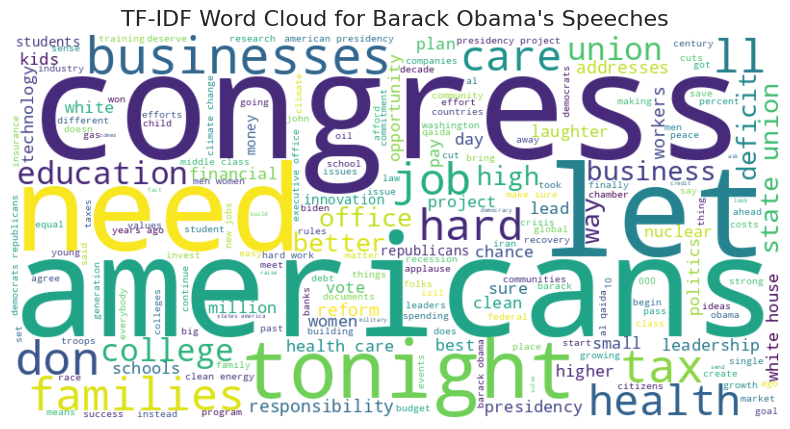

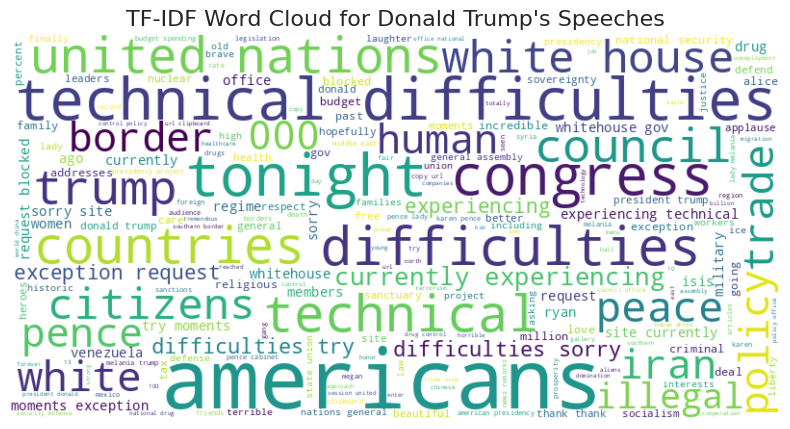

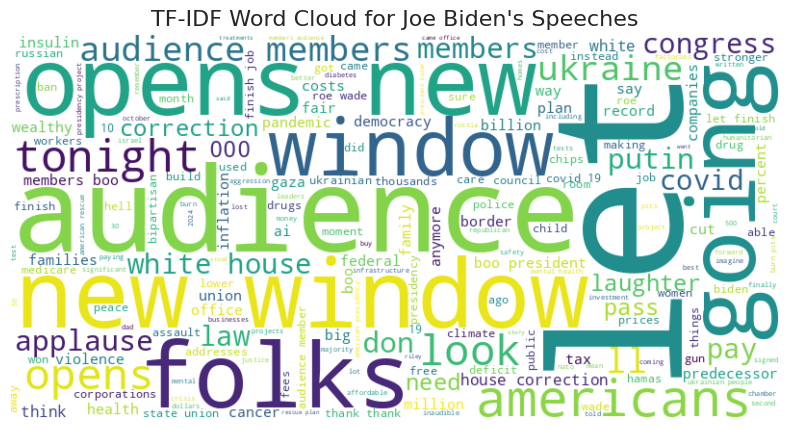

In [78]:
# Creating an overall word cloud for each President that uses text from the speeches they made at both forums collectively.

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Generate word cloud for each president based on their TF-IDF scores
def generate_tfidf_word_cloud(president, tfidf_matrix, feature_names, data):
    # Get the rows corresponding to the given president
    president_data = data[data['president'] == president]

    # Find the index of the speeches by the president
    president_indices = president_data.index

    # Sum the TF-IDF values for all speeches by this president
    president_tfidf = np.sum(tfidf_matrix[president_indices], axis=0)

    # Create a dictionary of word -> tf-idf score
    tfidf_dict = {feature_names[i]: president_tfidf[0, i] for i in range(len(feature_names))}

    # Generate the word cloud for the president's speeches based on their TF-IDF scores
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"TF-IDF Word Cloud for {president}'s Speeches", fontsize=16)
    plt.show()

# Generate word cloud for each president based on TF-IDF scores
for president in presidents:
    generate_tfidf_word_cloud(president, tfidf_matrix, feature_names, merged_df)


This step showed that energy was not one of the main focuses of these speeches. President Obama used words like Congress and American the most followed by terms like businesses, tax and jobs. This gives the impression that he was focused on boosting the economy post-recession.

President Trump’s most used words included Americans and technical difficulties. It seems to include a wide array of subjects with no clear direction evident from the word cloud.

Similarly, President Biden’s words also show no clear direction with words like audience, new window and folks.


### *Energy related word cloud*

For a more targeted analysis, only energy keywords were plotted as a word cloud, and this gave a much clearer picture.

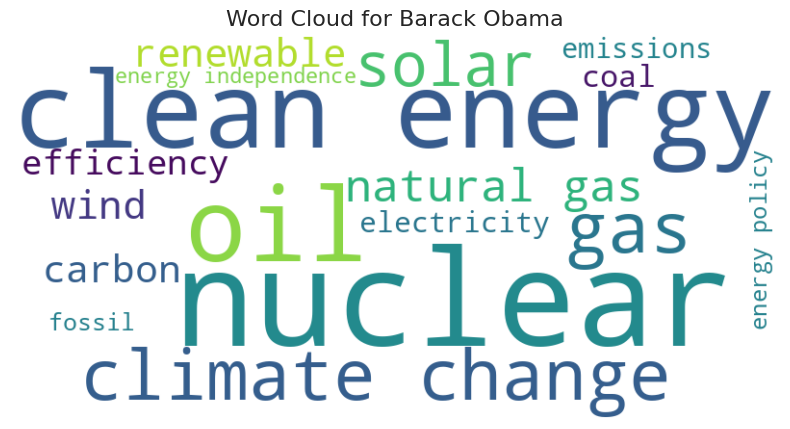

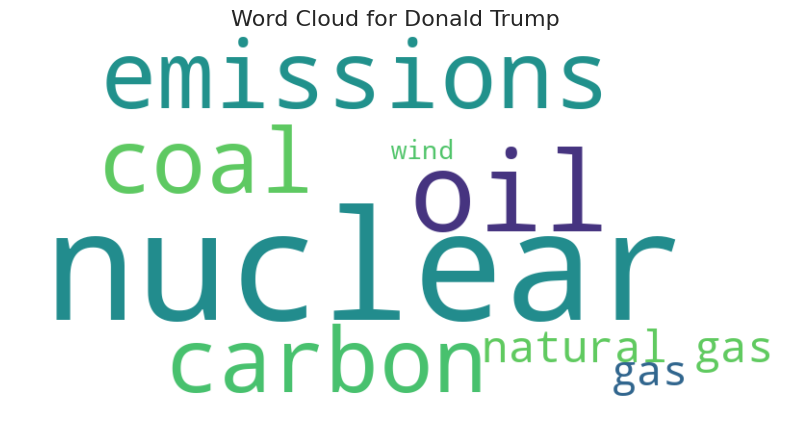

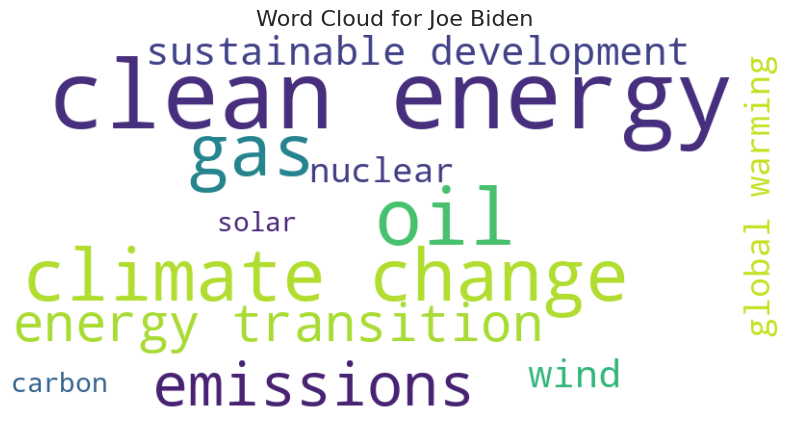

In [79]:
# Moreover, the following word clouds have been created for each President, whilst keeping the energy-related keywords as the primary filter, in order to see their most popular/reoccuring words and terms.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

energy_terms_df = pd.DataFrame(term_frequencies, columns=energy_keywords)
energy_terms_df['president'] = merged_df['president']

# Function to generate word cloud for each president
def generate_word_cloud(president, data, keywords):
    # Get the terms and their frequencies for the specific president
    president_data = data[data['president'] == president]

    # Create a dictionary of term frequencies for the word cloud
    word_frequencies = president_data[keywords].sum(axis=0).to_dict()

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {president}", fontsize=16)
    plt.show()

# List of presidents to generate word clouds for
presidents = ['Barack Obama', 'Donald Trump', 'Joe Biden']

# Loop through each president and generate the word cloud
for president in presidents:
    generate_word_cloud(president, energy_terms_df, energy_keywords)

While President Obama focused on nuclear, clean energy and climate change, President Trump talked more about oil, coal and carbon along with nuclear. President Biden spoke more about clean energy, climate change and energy transition with a clearer focus on renewables.

These word clouds show that the three presidents did, overall, stick to their campaign claims in their speeches.


### *Breakdown by forum*

#### Bar Plot of Word Frequencies

For a better understanding, the words spoken by each president were further categorized by forum – SoU or UNGA. A bar plot was used for a comparison of how much each president spoke about the energy sector at each forum and which kinds of words were spoken. For this purpose, a new variable president_forum was created that combined two variables. ChatGPT was used for this part. The prompts used included "What is the best way to compare frequency of words used in speeches" and "How can I create a bar plot in python with colors showing which terms are used."

<Figure size 1400x800 with 0 Axes>

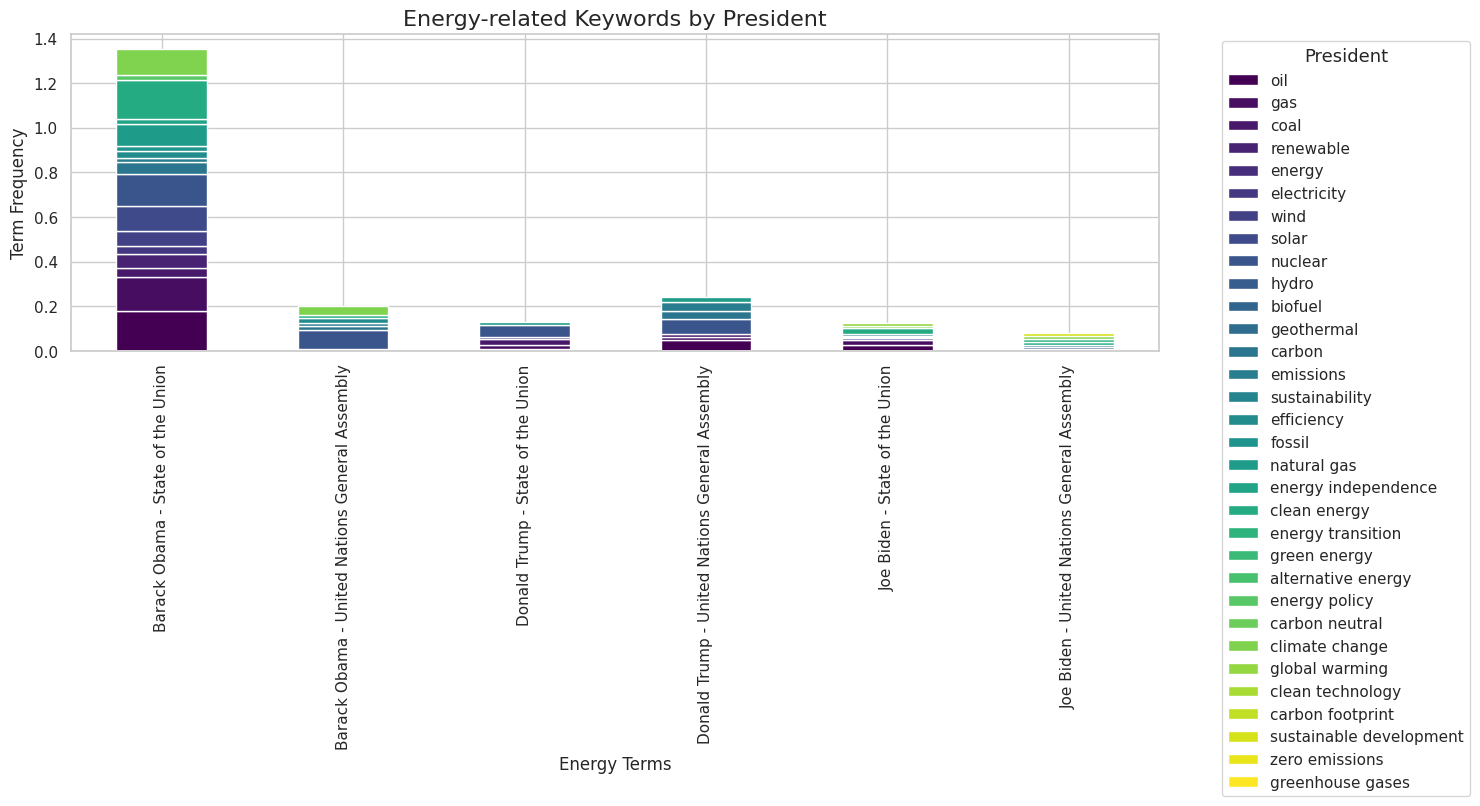

In [80]:
# Another analysis here is to visualize the frequency of these keywords in accordance with which President spoke them and at which forum.
# Primary purpose of doing so is to compare their respective stance on these topics, and visualize the difference across the three.

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Add the energy term frequencies to 'merged_df'

energy_terms_df = pd.DataFrame(term_frequencies, columns=energy_keywords)

# Add 'president' and 'forum' information from merged_df
energy_terms_df['president_forum'] = merged_df['president'] + ' - ' + merged_df['forum']
energy_terms_df['president'] = merged_df['president']

# Step 2: Aggregate the data by president
# Sum the term frequencies for each president
aggregated_data = energy_terms_df.groupby('president_forum').sum()

# Step 3: Plot the aggregated data
# plot the term frequencies for each president

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a barplot where x = energy terms and y = frequency count
aggregated_data.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

# Customize the plot
plt.title('Energy-related Keywords by President', fontsize=16)
plt.xlabel('Energy Terms', fontsize=12)
plt.ylabel('Term Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='President', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


This analysis shows that President Obama spoke the most about the energy sector in his SoU address. He spoke much less about it in his UNGA addresses. In fact, President Trump spoke more about the energy sector in his UNGA addresses compared to President Obama. Obama heavily used words like oil, coal and gas in his SoU addresses but gave more clean energy focused speeches in the UNGA with more focus on climate change and nuclear.

President Trump talked mostly about oil, gas and nuclear with a little bit of focus on emissions and renewables in his speech to the UNGA. His SoU speech was mostly focused on fossils. Similarly, President Biden also showed more of a clean energy leaning in the UNGA speeches compared to SoU ones. He talked about oil and gas only in the latter.


In [81]:
keyword_freq_df=keyword_freq_df.stack().reset_index()

In [82]:
keyword_freq_df = keyword_freq_df.rename(columns={0:'tfidf', 'level_0': 'president','level_1': 'term'})

#### Heat map of TF-IDF Scores

To create a heat map, a stacked dataset was created with columns for tfidf, president and term. Nuclear, oil and gas were marked with a red dot and, to prevent overlapping of too many words, only the top 10 words with the highest TF-IDF scores were displayed.

In [91]:
import altair as alt
import numpy as np

# Combine president and forum into a single column
keyword_freq_df['president_forum'] = merged_df['president'] + ' - ' + merged_df['forum']

# Terms in this list will get a red dot in the visualization
term_list = ['nuclear', 'oil', 'gas']

# Rank terms for each president, ensuring unique ranks
keyword_freq_df['rank'] = keyword_freq_df.groupby('president_forum')['tfidf'].rank(method='first', ascending=False)

# Filter for the top 10 terms per president_forum
top_10_keyword_freq_df = keyword_freq_df[keyword_freq_df['rank'] <= 10]

# Base chart with x and y axes
base = alt.Chart(top_10_keyword_freq_df).encode(
    x=alt.X('rank:O', title='Rank'),
    y=alt.Y('president_forum:N', title='President - Forum')
)

# Heatmap layer
heatmap = base.mark_rect().encode(
    color=alt.Color('tfidf:Q', title='TF-IDF Score', scale=alt.Scale(scheme='blues'))
)

# Red circle layer for specific terms
circle = base.mark_circle(size=100).encode(
    color=alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value(None)  # Transparent for non-matching terms
    )
)

# Text layer for terms
text = base.mark_text(baseline='middle', align='center').encode(
    text=alt.Text('term:N'),
    color=alt.condition(
        alt.datum.tfidf >= 0.15,  # Adjust threshold as needed
        alt.value('white'),  # Text color for higher tfidf scores
        alt.value('black')
    ),
    size=alt.value(12)  # Adjust text size for readability
)

# Combine all layers and display
final_chart = (heatmap + circle + text).properties(
    width=1000,
    height=500,
    title="Top 10 Terms by TF-IDF for Each President and Forum"
)
from altair_saver import save
save(final_chart, 'chart.html', embed_options={'mode': 'vega-lite'})
final_chart

alt.LayerChart(...)

As compared to the bar graph above which only looked at word frequencies, when we look at TF-IDF scores the picture changes a little. President Obama's top used words in his SoU addresses were nuclear, gas and solar while President Trump spoke most about carbon. President Biden spoke most about efficiency and emissions.

In UNGA speeches, there is a much stronger leaning towards clean energy for President Trump with words like clean energy and natural gas used more. Contrary to expectations and campaign agendas, Presidents Obama and Biden spoke about fossils and oil. So we see them align with their agendas in SoU speeches but not in UNGA ones.

In [84]:
print(keyword_freq_df.columns)


Index(['president', 'term', 'tfidf', 'president_forum', 'rank'], dtype='object')


### TF-IDF by Forum

To understand more about how different forums impacted each president’s energy sector leanings in speeches a TF-IDF data frame was created that showed terms used in each forum.

In [85]:
# Forum-Based Analysis ; primarily in order to see if Presidents' have had any difference in approach when addressing the State of Union, versus the United Nations General Assembly.
# In order to do so, using our metadata filters, we can create separate TF-IDF matrices for each forum, and then visualize the difference.

# Filter data by Forum (State of the Union and United Nations General Assembly)
state_of_union_df = merged_df[merged_df['forum'] == 'State of the Union']
un_ga_df = merged_df[merged_df['forum'] == 'United Nations General Assembly']

# Generate TF-IDF matrix for State of the Union forum
vectorizer_state_of_union = TfidfVectorizer(stop_words='english')
tfidf_state_of_union_matrix = vectorizer_state_of_union.fit_transform(state_of_union_df['text'])

# Generate TF-IDF matrix for United Nations General Assembly forum
vectorizer_un_ga = TfidfVectorizer(stop_words='english')
tfidf_un_ga_matrix = vectorizer_un_ga.fit_transform(un_ga_df['text'])

# Get the feature names (words) for both forums
state_of_union_feature_names = vectorizer_state_of_union.get_feature_names_out()
un_ga_feature_names = vectorizer_un_ga.get_feature_names_out()

# Define your energy-related terms
energy_keywords = [
    "clean", "power", "oil", "gas", "coal", "renewable", "energy", "electricity",
    "wind", "solar", "nuclear", "hydro", "biofuel", "geothermal", "carbon", "emissions",
    "sustainability", "efficiency", "fossil", "natural gas", "energy independence",
    "clean energy", "energy transition", "green energy", "alternative energy", "energy policy",
    "carbon neutral", "climate change", "global warming"
]

# Function to get the frequency of keywords in a given TF-IDF matrix
def get_keyword_frequencies(tfidf_matrix, feature_names, keywords):
    # Convert TF-IDF matrix to array
    tfidf_array = tfidf_matrix.toarray()

    # Create a dictionary to store keyword frequencies, initialize with 0
    keyword_frequencies = {keyword: 0 for keyword in keywords}

    # Loop through each feature name (word) in the TF-IDF model
    for idx, keyword in enumerate(feature_names):
        if keyword in keyword_frequencies:
            # Sum the TF-IDF scores for this keyword across all documents
            keyword_frequencies[keyword] += tfidf_array[:, idx].sum()

    return keyword_frequencies

# Get the frequencies of the energy-related keywords for each forum
state_of_union_frequencies = get_keyword_frequencies(tfidf_state_of_union_matrix, state_of_union_feature_names, energy_keywords)
un_ga_frequencies = get_keyword_frequencies(tfidf_un_ga_matrix, un_ga_feature_names, energy_keywords)

# Convert the results into a DataFrame for better visualization
state_of_union_frequencies_df = pd.DataFrame(list(state_of_union_frequencies.items()), columns=['Keyword', 'Frequency'])
un_ga_frequencies_df = pd.DataFrame(list(un_ga_frequencies.items()), columns=['Keyword', 'Frequency'])

# Merge the results to compare frequencies
merged_frequencies_df = pd.merge(state_of_union_frequencies_df, un_ga_frequencies_df, on='Keyword', suffixes=('_StateOfUnion', '_UNGA'))

# Display the comparison dataframe
print(merged_frequencies_df)


                Keyword  Frequency_StateOfUnion  Frequency_UNGA
0                 clean                0.342420        0.064841
1                 power                0.390074        0.124523
2                   oil                0.260370        0.094216
3                   gas                0.239837        0.026890
4                  coal                0.087862        0.016518
5             renewable                0.085913        0.012085
6                energy                0.669248        0.154119
7           electricity                0.045330        0.000000
8                  wind                0.105326        0.014400
9                 solar                0.139685        0.000000
10              nuclear                0.290681        0.214261
11                hydro                0.000000        0.000000
12              biofuel                0.000000        0.000000
13           geothermal                0.000000        0.000000
14               carbon                0

This shows that the most used words in SoU addresses were clean, power, oil, gas and nuclear. However, in UNGA speeches these were replaced with power, energy and nuclear.

#### *Bar plot*

For visual comparison, a bar plot was created using ChatGPT. This plot aims to show which terms were used in which forum.

The plot shows that there was a heavier emphasis on clean energy in SoU speeches compared to UNGA ones.


<ipython-input-86-6b9885c2b0ff>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Frequency_StateOfUnion", y="Keyword", data=merged_frequencies_df, color="blue", label="State of the Union", ci=None, alpha=0.6)
<ipython-input-86-6b9885c2b0ff>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Frequency_UNGA", y="Keyword", data=merged_frequencies_df, color="red", label="UNGA", ci=None, alpha=0.6)


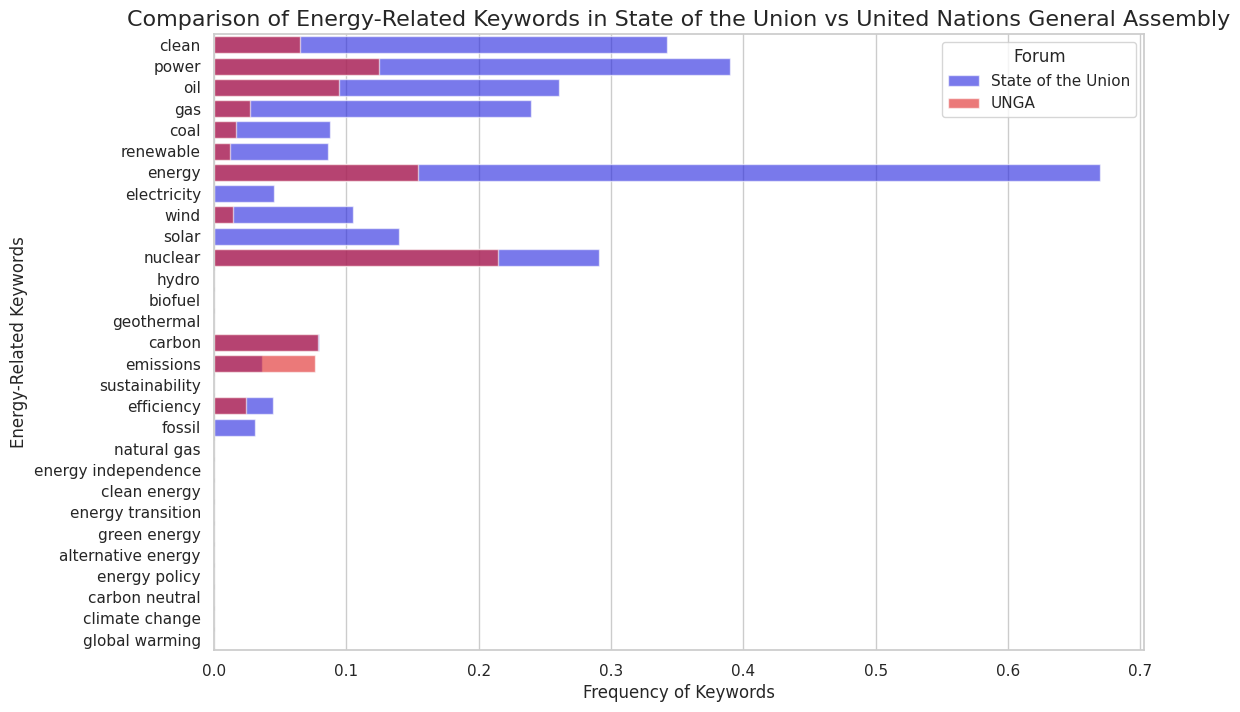

In [86]:
# Visualizing the above output, and seeing the difference in energy-related keyword usage across both forums;

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axes for the bar chart
plt.figure(figsize=(12, 8))

# Plot a horizontal bar chart comparing frequencies for each forum
sns.barplot(x="Frequency_StateOfUnion", y="Keyword", data=merged_frequencies_df, color="blue", label="State of the Union", ci=None, alpha=0.6)

sns.barplot(x="Frequency_UNGA", y="Keyword", data=merged_frequencies_df, color="red", label="UNGA", ci=None, alpha=0.6)

# Add a title and labels
plt.title("Comparison of Energy-Related Keywords in State of the Union vs United Nations General Assembly", fontsize=16)
plt.xlabel("Frequency of Keywords", fontsize=12)
plt.ylabel("Energy-Related Keywords", fontsize=12)

# Adding a legend
plt.legend(title="Forum")

# Show the plot
plt.show()

## Limitations

While this analysis shows which words are used by which president and in which forum it is difficult to conclude energy leanings conclusively due to the following reasons.


*   Without analyzing which context each word was used in we cannot discern the meaning implied. For example, Presidents Obama and Trump talked a lot about nuclear but we cannot gauge whether this was nuclear energy or nuclear bombs. Furthermore, when President Biden talked about oil in his UNGA speeches, was he talking about limiting oil extraction or increasing it?
*   President Obama had the longest tenure as president out of the three which means that his speeches include a lot more of the key words. While TF-IDF does control for document frequency somewhat, we can see that his data skews the comparisons.
*   We are using speeches as proxy for leanings of presidents, but their policies and actions may differ from what they spoke about. Hence, this is not the complete picture of reality.


## Conclusion

If we do not break the analysis down by forum it appears that presidents do stand by their campaign promises and their energy related terminology aligns with their respective stance. However, when we look at forum level analysis using TF-IDF, it appears that most of the clean energy leanings are displayed in the SoU speeches for Presidents Obama and Biden. In speeches to the Congress the messages are more mixed, and we see all presidents speaking about clean energy, even Trump. Their speeches at home may be targeted towards clean energy or fossils based on the policy requirements at the time. However, in UNGA speeches they show much less leaning towards clean energy and energy transition, perhaps because of competition with other polluting countries and seeing emissions as a zero-sum game. Hence, our hypothesis is disproven, and presidents’ speeches do not show a strict alignment with their campaign promises.

Presidents, therefore, modify their speeches based on their audience and they may be employing this tactic at the time of election campaigns too. They say what their voters want to hear and it is important that voters keep this in mind when deciding which candidate they wish to vote for. From a policy perspective, greater accountability of presidents against their campaign promises should be implemented. The Congress, especially, could represent the voice of voters and make it an indicator of honesty and integrity for presidents to follow through on their agendas.


## Sources



*   White house archives: https://www.whitehouse.gov/briefing-room/presidential-actions/
*   American Presidency Project: https://www.presidency.ucsb.edu/
*   President Obama’s campaign promises: https://www.presidency.ucsb.edu/documents/obama-campaign-press-release-obama-announce-new-plan-make-america-global-energy-leader
*   President Trump’s campaign promises: https://www.npr.org/2016/11/09/501451368/here-is-what-donald-trump-wants-to-do-in-his-first-100-days
*   President Biden’s campaign promises: https://www.biologicaldiversity.org/programs/public_lands/energy/pdfs/9-Key-Elements-of-Joe-Bidens-Plan-for-a-Clean-Energy-Revolution-_-Joe-Biden-for-President_-Official-Campaign-Website.pdf
